# Tech Stock Prices
This dataset consists of the daily stock prices and volume of ten different tech companies: Apple (AAPL), Amazon (AMZN), Alibaba (BABA), Salesforce (CRM), Facebook (FB), Alphabet (GOOG), Intel (INTC), Microsoft (MSFT), Nvidia (NVDA), and Tesla (TSLA).

There are ten CSV files in the `data/` folder named with the stock symbol for each of the ten companies listed above. 
Looking for another company? You can download it from [Yahoo Finance](https://finance.yahoo.com/) and upload it to your workspace.

Not sure where to begin? Scroll to the bottom to find challenges!

## Import the necessary libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


## Path to the folder containing your CSV files

In [2]:
data_folder = "data"

In [3]:
## List all CSV files in the folder

In [4]:
csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

## Dictionary to hold DataFrames for each stock

In [5]:
stock_data = {}

## Loop through each CSV file

In [6]:
for file in csv_files:
    # Extract stock ticker from filename (e.g., AAPL from AAPL.csv)
    ticker = file.replace(".csv", "")
    ## Load the CSV into a DataFrame
    df = pd.read_csv(
        os.path.join(data_folder, file),
        parse_dates = ['Date'],
        index_col = 'Date'
    ).sort_index()
    ## Store in dictionary
    stock_data[ticker] = df
    
    ## Print exploratory information
    print(f"Ticker: {ticker}")
    print(f"Shape: {df.shape}")
    print(df.head(5))
    print("="*75)

Ticker: AAPL
Shape: (2999, 6)
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.553025  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.564355  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.459939  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.447999  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.490865  447610800
Ticker: AMZN
Shape: (2999, 6)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  136.250000  136.610001  133.139999  133.899994  133.899994   
2010-01-05  133.429993  135.479996  131.809998  134.690002  134.690002   
2010-01-06  134.600006  134.729996  131.649994  132.250000  132.250000   
2010-01-07  132.009995  132.320007  128.800003  130.000000 

In [7]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


## Which stock has the highest latest closing prices?

In [8]:
latest_closing_prices = {
    ticker: df['Close'].iloc[-1]
    for ticker, df in stock_data.items()
}

# Identify the top ticker
top_ticker   = max(latest_closing_prices, key=latest_closing_prices.get)
top_price    = latest_closing_prices[top_ticker]   

print(
    f"The highest recent closing price is {top_ticker} at ${top_price:,.2f}"
)

The highest recent closing price is AMZN at $3,507.07


## Dictionary to hold monthly data

In [9]:
  
    # Resample to end of month and take last available Close price
monthly_close = {
    ticker: df['Close'].resample('ME').last()
    for ticker, df in stock_data.items()
}

# Combine into a DataFrame
monthly_df = pd.DataFrame(monthly_close)

# Melt the DataFrame to clean format for Seaborn
clean_df = (monthly_df
            .reset_index()
            .melt(
                id_vars='Date', 
                var_name='Ticker', 
                value_name='Close'
                )
)

## Plotting the monthly_closing_prices data

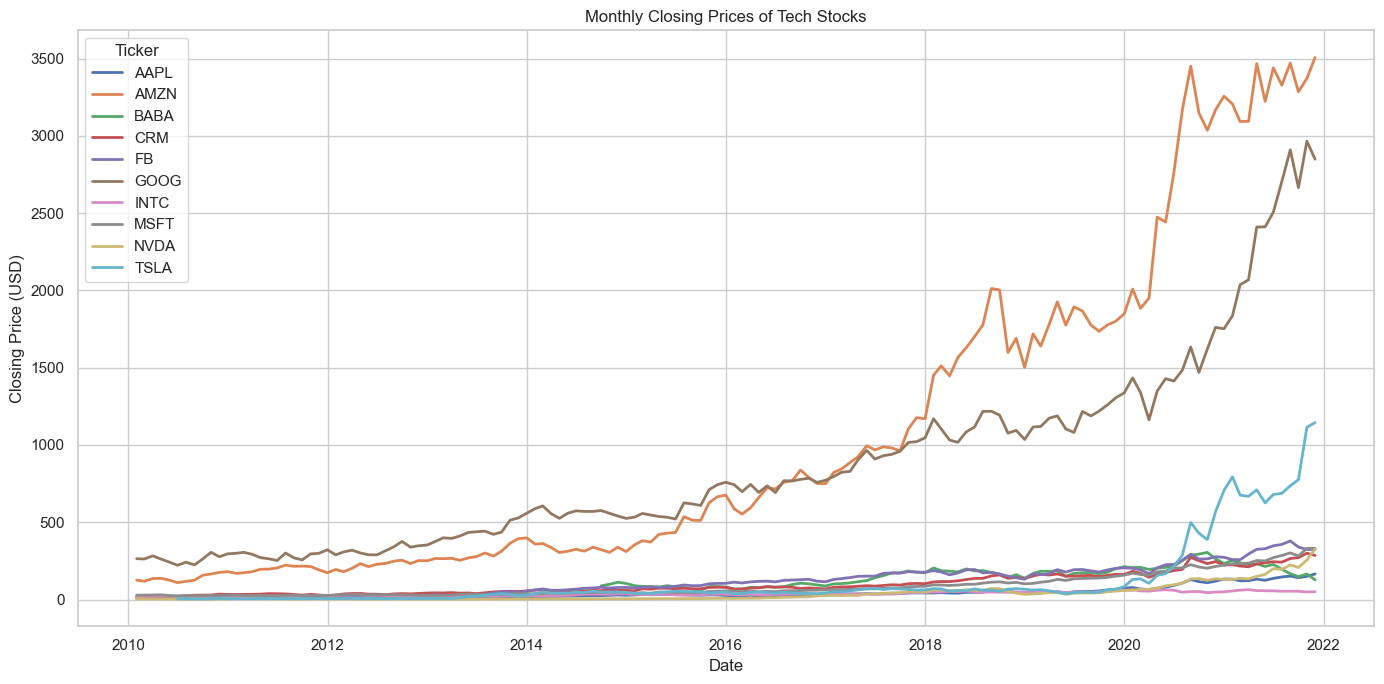

In [10]:
# Set Seaborn theme
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=clean_df,
    x='Date',
    y='Close',
    hue='Ticker',
    linewidth=2
)
plt.title('Monthly Closing Prices of Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.tight_layout()
plt.show()

## Which stock gained the most (in % terms) over its lifetime?

In [11]:
# Compute percent change: (last - first) / first * 100
pct_changes = {}
for ticker, df in stock_data.items():
    first, last = df['Close'].iloc[0], df['Close'].iloc[-1]
    pct_changes[ticker] = (last - first) / first * 100

# Sort descending
sorted_changes = sorted(
    pct_changes.items(),
    key=lambda x: x[1],
    reverse=True
)

# Display top performers
print("Percent gains over full history:")
for ticker, pct in sorted_changes:
    print(f"• {ticker}: {pct:.1f}%")

best_ticker, best_pct = sorted_changes[0]
print(
    f"\nTop gainer: {best_ticker} with a {best_pct:.1f}% increase."
)


Percent gains over full history:
• TSLA: 23919.3%
• NVDA: 6968.9%
• AMZN: 2519.2%
• AAPL: 2062.7%
• CRM: 1423.4%
• MSFT: 968.1%
• FB: 853.5%
• GOOG: 812.6%
• INTC: 139.5%
• BABA: 41.9%

Top gainer: TSLA with a 23919.3% increase.


## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which of the ten companies has the highest closing price based on the most recent data?
- 📊 **Visualize**: Create a plot that visualizes the closing price at the end of each month for the 10 tech stocks.
- 🔎 **Analyze**: Which of the ten companies have experienced the greatest percent increase in closing price over the course of their existence?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have been hired as an analyst for a small investment firm. They are interested in technology companies. Your manager has asked you to explore the returns and volatilities of the ten stocks provided.

Commodity prices can be found [here](https://finance.yahoo.com/commodities/).